In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel


X_train = np.load('initial_data/function_2/initial_inputs.npy')
Y_train = np.load('initial_data/function_2/initial_outputs.npy')

In [4]:
X_train = np.append(X_train, [[0.000009, 0.999999],[0.808080,0.959595],[0.58,0.82],[0.66,0.7],[0.8  ,0.84],[0.82,0.83]], axis=0)
Y_train = np.append(Y_train, [0.0742784031180832,0.0463057195836808,0.130234941506578,0.4305514078899863,0.029117158111130886,0.0324039193659396])

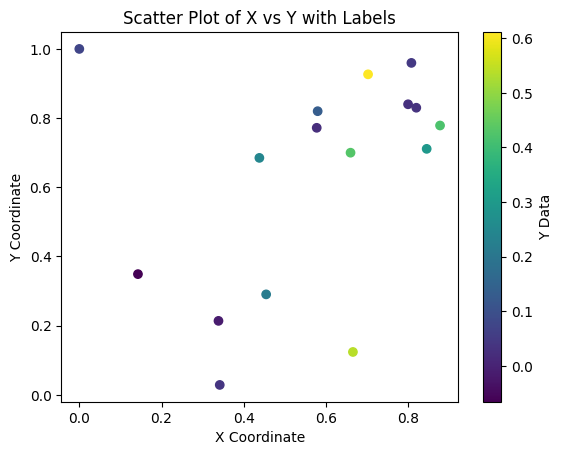

In [5]:
x_coords = X_train[:, 0]
y_coords = X_train[:, 1]

# Create the scatter plot
plt.scatter(x_coords, y_coords, c=Y_train, cmap='viridis', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of X vs Y with Labels')
plt.colorbar(label='Y Data')  # Add a color bar to show the Y values
plt.show()

In [6]:
kernel = Matern(nu=2.5) + WhiteKernel(noise_level=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, normalize_y=True)
gp.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=1e-05,
                         kernel=Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1),
                         normalize_y=True)

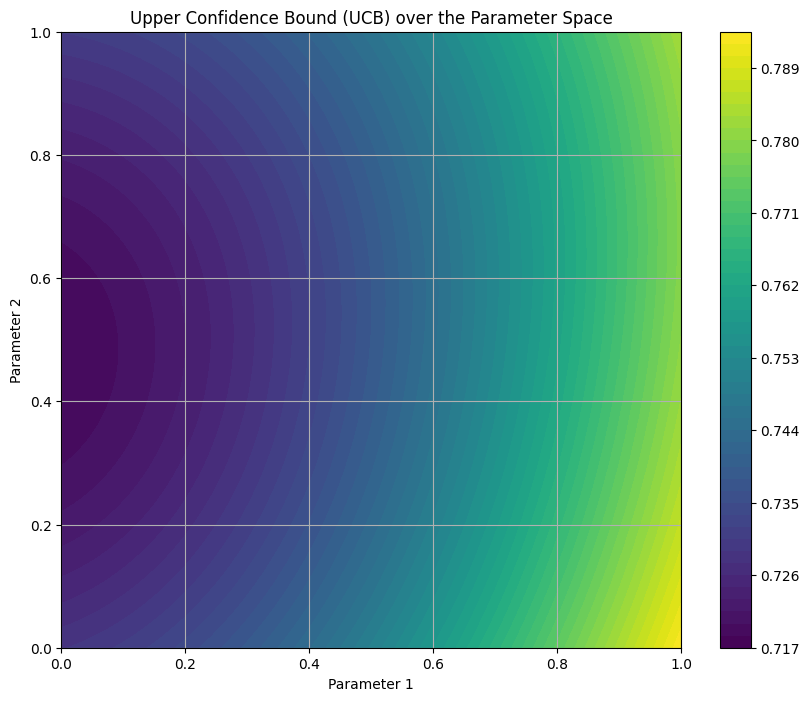

Recommended region for further exploration based on UCB: [1. 0.]


In [7]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
X_grid = np.vstack((X.ravel(), Y.ravel())).T

# Prediction over the grid to calculate UCB
mean, std = gp.predict(X_grid, return_std=True)

# UCB calculation with a chosen kappa value
kappa = 2.576  # Adjust kappa based on desired exploration-exploitation trade-off
UCB = mean + kappa * std

# Reshape for plotting
UCB_reshaped = UCB.reshape(100, 100)

# Plotting UCB over the grid
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, UCB_reshaped, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Upper Confidence Bound (UCB) over the Parameter Space")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.grid(True)
plt.show()

# Identify the highest UCB regions
max_indices = np.argmax(UCB)
recommended_region = X_grid[max_indices]
print("Recommended region for further exploration based on UCB:", recommended_region)

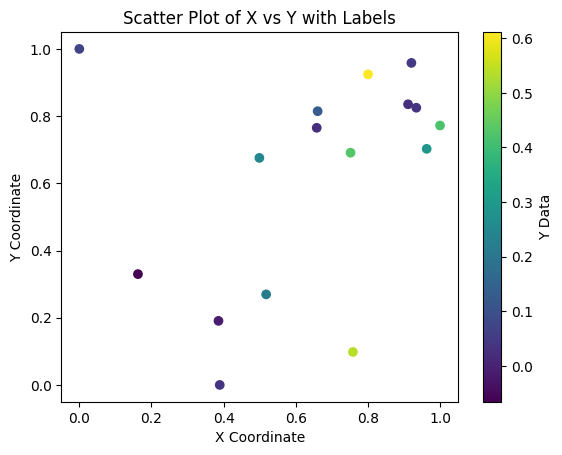

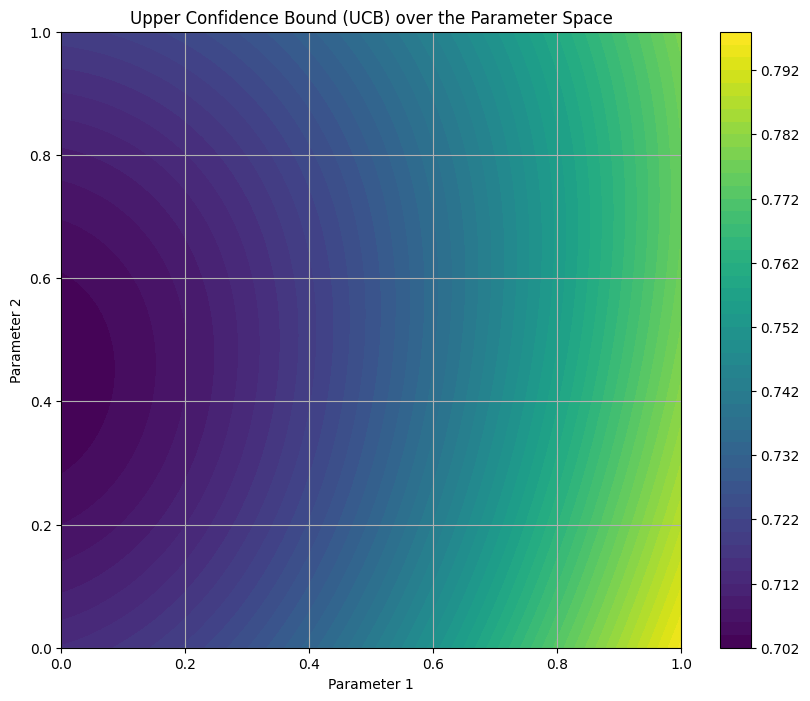

Recommended region for further exploration based on UCB: [1. 0.]
Recommended region (original scale): [[0.87779099 0.02869772]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.preprocessing import MinMaxScaler

# Load the initial data
X_train = np.load('initial_data/function_2/initial_inputs.npy')
Y_train = np.load('initial_data/function_2/initial_outputs.npy')

# Append additional data points
X_train = np.append(X_train, [[0.000009, 0.999999], [0.808080, 0.959595], [0.58, 0.82], [0.66, 0.7], [0.8, 0.84], [0.82, 0.83]], axis=0)
Y_train = np.append(Y_train, [0.0742784031180832, 0.0463057195836808, 0.130234941506578, 0.4305514078899863, 0.029117158111130886, 0.0324039193659396])

# Normalize the input data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Scatter plot of training data
x_coords = X_train_normalized[:, 0]
y_coords = X_train_normalized[:, 1]

plt.scatter(x_coords, y_coords, c=Y_train, cmap='viridis', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of X vs Y with Labels')
plt.colorbar(label='Y Data')
plt.show()

# Define the Gaussian Process model
kernel = Matern(nu=2.5) + WhiteKernel(noise_level=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, normalize_y=True)
gp.fit(X_train_normalized, Y_train)

# Increase the resolution of the grid for predictions
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)
X_grid = np.vstack((X.ravel(), Y.ravel())).T

# Predict using the GP model
mean, std = gp.predict(X_grid, return_std=True)

# Calculate the UCB
kappa = 2.576
UCB = mean + kappa * std

# Reshape the UCB for plotting
UCB_reshaped = UCB.reshape(200, 200)

# Plot the UCB over the parameter space
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, UCB_reshaped, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Upper Confidence Bound (UCB) over the Parameter Space")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.grid(True)
plt.show()

# Identify the highest UCB region
max_indices = np.argmax(UCB)
recommended_region = X_grid[max_indices]
print("Recommended region for further exploration based on UCB:", recommended_region)

# Transform the recommended region back to the original scale
recommended_region_original = scaler.inverse_transform([recommended_region])
print("Recommended region (original scale):", recommended_region_original)
